<a href="https://colab.research.google.com/github/alisha-2/Stock_Market_Prediction_Using_LSTM_and_Federated_Learning/blob/main/mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LSTM CODE**

[*********************100%%**********************]  1 of 1 completed

Epoch 1/10



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - loss: 0.1406
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0268
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0.0163
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0101
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0070
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 0.0073
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 0.0086
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0065
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0074
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0063
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 451ms/step
Model Accuracy (MAPE): 96.58%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted N225 Index for next day: 38664.89381010388
Previous Close: 39101.8203125
SMA: 39711.369419642855
EMA: 39297.10105567351
RSI: 46.059423129481374
MACD: -317.6807594189595
Volume: 146400000.0
Open: 38140.76953125
High: 39188.37109375
Low: 37954.37890625

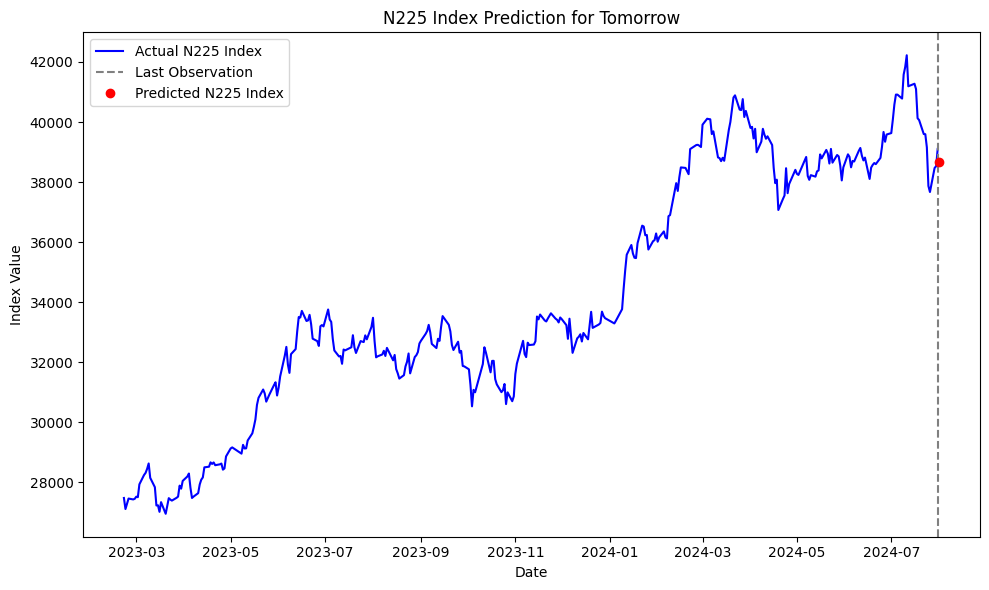

In [ ]:
!pip install ta
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import ta
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data
def add_technical_indicators(data):
    # Add Simple Moving Average (SMA)
    data['SMA'] = ta.trend.sma_indicator(data['Close'], window=14)
    # Add Exponential Moving Average (EMA)
    data['EMA'] = ta.trend.ema_indicator(data['Close'], window=14)
    # Add Relative Strength Index (RSI)
    data['RSI'] = ta.momentum.rsi(data['Close'], window=14)
    # Add MACD
    macd = ta.trend.MACD(data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_Signal'] = macd.macd_signal()
    data['MACD_Diff'] = macd.macd_diff()
    # Ensure no NaN values
    data = data.dropna()
    return data
def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length, 0])  # Predicting the closing price
    return np.array(X), np.array(y)
def split_data(X, y, train_ratio):
    train_size = int(len(X) * train_ratio)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    return X_train, X_test, y_train, y_test
def build_model(seq_length, feature_count):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, feature_count)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def main():
    ticker_ftse = '^N225'
    #ticker_ftse = '^NYA'
    #ticker_ftse = '^FTSE'
    #ticker_ftse = '^BSESN'
    start_date = '2023-01-01'
    end_date = '2024-08-01'
    seq_length = 60
    train_ratio = 0.8
    data_ftse = fetch_stock_data(ticker_ftse, start_date, end_date)
    data_ftse = add_technical_indicators(data_ftse)
    feature_columns = ['Close', 'SMA', 'EMA', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Diff',
                       'Volume', 'Open', 'High', 'Low']
    data_ftse_features = data_ftse[feature_columns]
    scaled_data_ftse, scaler_ftse = preprocess_data(data_ftse_features)
    X_ftse, y_ftse = create_sequences(scaled_data_ftse, seq_length)
    X_train, X_test, y_train, y_test = split_data(X_ftse, y_ftse, train_ratio)
    model_ftse = build_model(seq_length, X_train.shape[2])
    model_ftse.fit(X_train, y_train, epochs=10, batch_size=32)
    y_pred = model_ftse.predict(X_test)
    y_test_scaled = y_test.reshape(-1, 1)
    y_test_inv = scaler_ftse.inverse_transform(
        np.hstack((y_test_scaled, np.zeros((y_test_scaled.shape[0], scaled_data_ftse.shape[1] - 1))))
    )[:, 0]
    y_pred_inv = scaler_ftse.inverse_transform(
        np.hstack((y_pred, np.zeros((y_pred.shape[0], scaled_data_ftse.shape[1] - 1))))
    )[:, 0]
    mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
    print(f"Model Accuracy (MAPE): {100 - mape:.2f}%")
    last_sequence_ftse = scaled_data_ftse[-seq_length:].reshape(1, seq_length, X_ftse.shape[2])
    prediction_ftse = model_ftse.predict(last_sequence_ftse)
    prediction_ftse = scaler_ftse.inverse_transform(
        np.hstack((prediction_ftse, np.zeros((prediction_ftse.shape[0], scaled_data_ftse.shape[1] - 1))))
    )[:, 0][0]
    print(f"Predicted N225 Index for next day: {prediction_ftse}")
    #print(f"Predicted NYA 100 Index for next day: {prediction_ftse}")
    #print(f"Predicted FTSE 100 Index for next day: {prediction_ftse}")
    #print(f"Predicted BSESN 100 Index for next day: {prediction_ftse}")
    last_row = data_ftse.iloc[-1]
    print(f"Previous Close: {last_row['Close']}")
    print(f"SMA: {last_row['SMA']}")
    print(f"EMA: {last_row['EMA']}")
    print(f"RSI: {last_row['RSI']}")
    print(f"MACD: {last_row['MACD']}")
    print(f"Volume: {last_row['Volume']}")
    print(f"Open: {last_row['Open']}")
    print(f"High: {last_row['High']}")
    print(f"Low: {last_row['Low']}")
    plt.figure(figsize=(10, 6))
    plt.plot(data_ftse.index, data_ftse['Close'], label='Actual N225 Index', color='blue')
    plt.axvline(x=data_ftse.index[-1], linestyle='--', color='gray', label='Last Observation')
    plt.plot(data_ftse.index[-1] + pd.Timedelta(days=1), prediction_ftse, 'ro', label='Predicted N225 Index')
    plt.title('N225 Index Prediction for Tomorrow')
    plt.xlabel('Date')
    plt.ylabel('Index Value')
    plt.legend()
    plt.tight_layout()
    plt.show()
    #plt.figure(figsize=(10, 6))
    #plt.plot(data_ftse.index, data_ftse['Close'], label='Actual NYA 100 Index', color='blue')
    #plt.axvline(x=data_ftse.index[-1], linestyle='--', color='gray', label='Last Observation')
    #plt.plot(data_ftse.index[-1] + pd.Timedelta(days=1), prediction_ftse, 'ro', label='Predicted NYA 100 Index')
    #plt.title('NYA Index Prediction for Tomorrow')
    #plt.xlabel('Date')
    #plt.ylabel('Index Value')
    #plt.legend()
    #plt.tight_layout()
    #plt.show()
    #plt.figure(figsize=(10, 6))
    #plt.plot(data_ftse.index, data_ftse['Close'], label='Actual FTSE 100 Index', color='blue')
    #plt.axvline(x=data_ftse.index[-1], linestyle='--', color='gray', label='Last Observation')
    #plt.plot(data_ftse.index[-1] + pd.Timedelta(days=1), prediction_ftse, 'ro', label='Predicted FTSE 100 Index')
    #plt.title('FTSE 100 Index Prediction for Tomorrow')
    #plt.xlabel('Date')
    #plt.ylabel('Index Value')
    #plt.legend()
    #plt.tight_layout()
    #plt.show()
    #plt.figure(figsize=(10, 6))
    #plt.plot(data_ftse.index, data_ftse['Close'], label='Actual BSESN 100 Index', color='blue')
    #plt.axvline(x=data_ftse.index[-1], linestyle='--', color='gray', label='Last Observation')
    #plt.plot(data_ftse.index[-1] + pd.Timedelta(days=1), prediction_ftse, 'ro', label='Predicted BSESN 100 Index')
    #plt.title('BSESN Index Prediction for Tomorrow')
    #plt.xlabel('Date')
    #plt.ylabel('Index Value')
    #plt.legend()
    #plt.tight_layout()
    #plt.show()
main()


**FEDERATED LEARNING CODE**

In [ ]:
!pip install tensorflow_federated
!pip install ta



[*********************100%%**********************]  1 of 1 completed


Round 1, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 66.996765), ('loss', 0.20966744), ('num_examples', 295), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
Round 2, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 24.626911), ('loss', 0.031622596), ('num_examples', 295), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
Round 3, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 27.331762), ('loss', 0.028507704), ('num_examples', 295), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])),

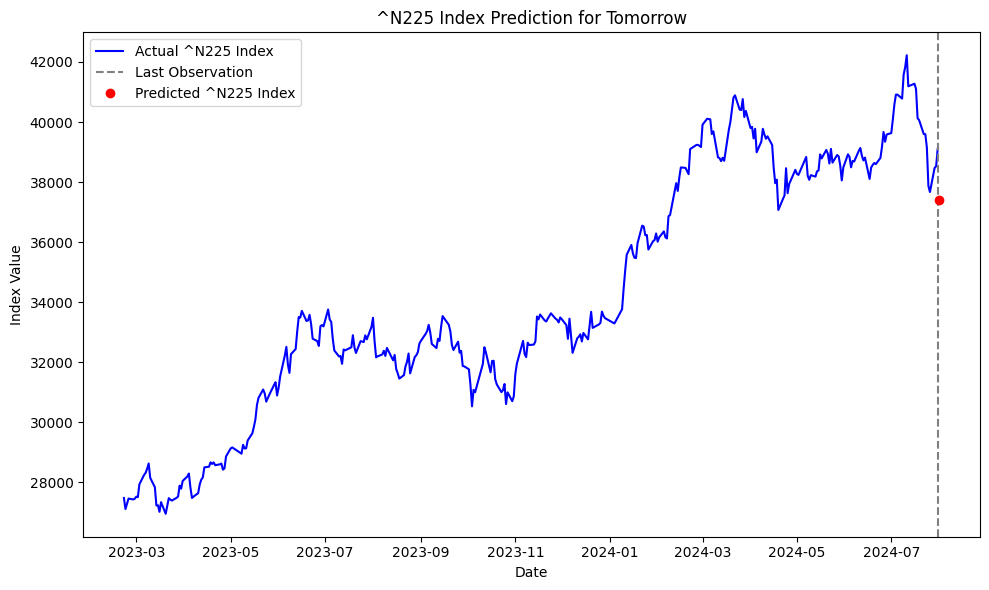

[*********************100%%**********************]  1 of 1 completed


Round 1, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 73.81593), ('loss', 0.19584887), ('num_examples', 303), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
Round 2, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 38.245667), ('loss', 0.038968273), ('num_examples', 303), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
Round 3, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 38.90146), ('loss', 0.034814496), ('num_examples', 303), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), (

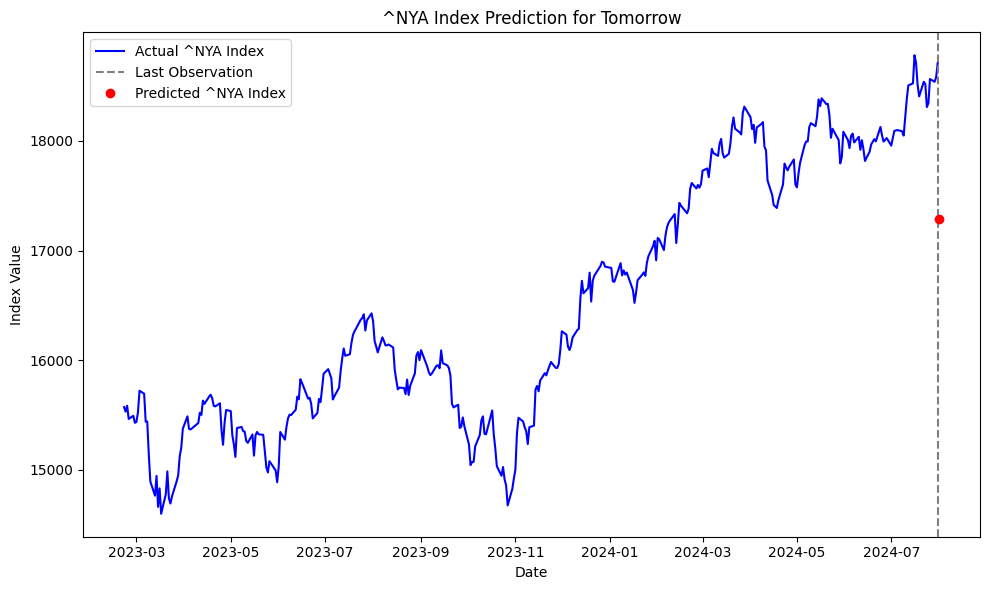

[*********************100%%**********************]  1 of 1 completed


Round 1, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 468357.6), ('loss', 0.138576), ('num_examples', 306), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
Round 2, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 373038.03), ('loss', 0.035397004), ('num_examples', 306), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
Round 3, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 668090.25), ('loss', 0.026151203), ('num_examples', 306), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('

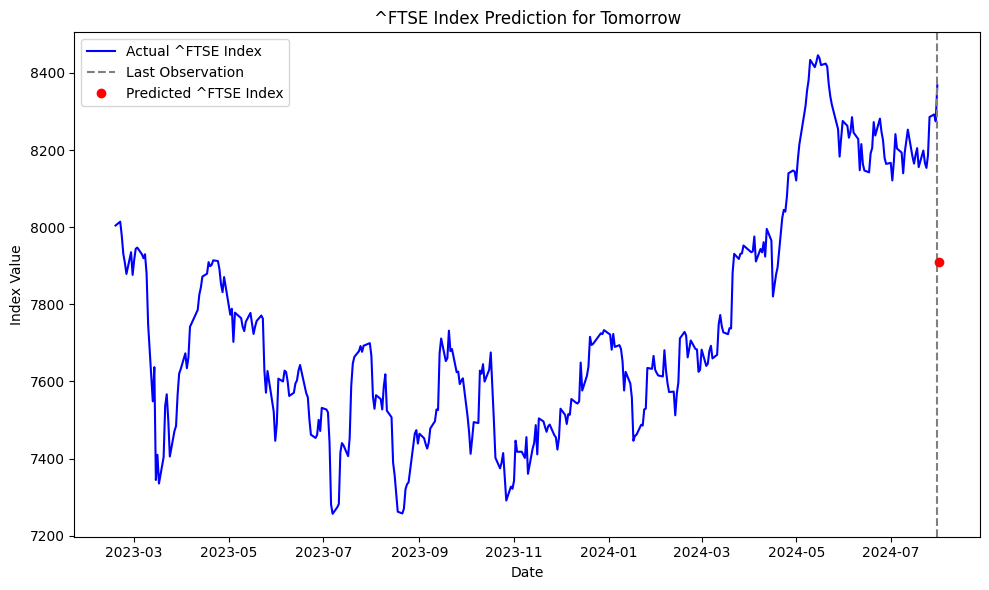

[*********************100%%**********************]  1 of 1 completed


Round 1, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 64.63054), ('loss', 0.16905393), ('num_examples', 293), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
Round 2, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 32.081303), ('loss', 0.030460032), ('num_examples', 293), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
Round 3, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 29.02417), ('loss', 0.021982174), ('num_examples', 293), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), (

1/1 [==============================] - 1s 1s/step
Predicted ^BSESN Index for next day: 73497.28630227968
Previous Close: 81741.34375
SMA: 80767.95033482143
EMA: 80730.12911242057
RSI: 70.47309914741707
MACD: 907.2638197203341
Volume: 6900.0
Open: 81655.8984375
High: 81828.0390625
Low: 81434.3203125


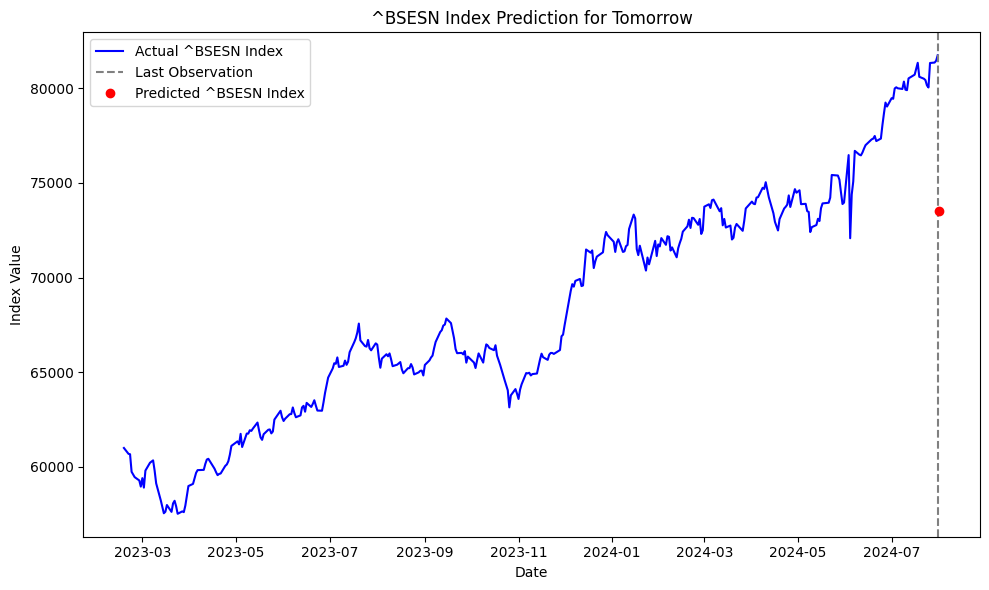

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import ta
import tensorflow_federated as tff
import tensorflow as tf

def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def add_technical_indicators(data):
    data['SMA'] = ta.trend.sma_indicator(data['Close'], window=14)
    data['EMA'] = ta.trend.ema_indicator(data['Close'], window=14)
    data['RSI'] = ta.momentum.rsi(data['Close'], window=14)
    macd = ta.trend.MACD(data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_Signal'] = macd.macd_signal()
    data['MACD_Diff'] = macd.macd_diff()
    data = data.dropna()
    return data

def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

def split_data(X, y, train_ratio):
    train_size = int(len(X) * train_ratio)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    return X_train, X_test, y_train, y_test

def build_federated_model(seq_length, feature_count):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, feature_count)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    return model

def split_data_among_clients(X, y, num_clients):
    client_data = []
    data_size_per_client = len(X) // num_clients
    for i in range(num_clients):
        start_idx = i * data_size_per_client
        end_idx = (i + 1) * data_size_per_client if i != num_clients - 1 else len(X)
        client_data.append((X[start_idx:end_idx], y[start_idx:end_idx]))
    return client_data

def create_federated_data(client_data):
    federated_data = []
    for X, y in client_data:
        dataset = tf.data.Dataset.from_tensor_slices((X, y)).batch(32)
        federated_data.append(dataset)
    return federated_data

def federated_learning_process(seq_length, feature_count, federated_data):
    def model_fn():
        model = build_federated_model(seq_length, feature_count)
        return tff.learning.models.from_keras_model(
            model,
            input_spec=federated_data[0].element_spec,
            loss=tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.MeanAbsolutePercentageError()]
        )

    iterative_process = tff.learning.algorithms.build_weighted_fed_avg(
        model_fn,
        client_optimizer_fn=lambda: tf.keras.optimizers.Adam(),
        server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0)
    )

    state = iterative_process.initialize()

    for round_num in range(1, 11):
        state, metrics = iterative_process.next(state, federated_data)
        print(f'Round {round_num}, Metrics: {metrics}')

    return state

def get_global_weights(state):
    return state.global_model_weights.trainable

def main():
    tickers = ['^N225', '^NYA', '^FTSE', '^BSESN']
    start_date = '2023-01-01'
    end_date = '2024-08-01'
    seq_length = 60
    num_clients = 5

    predictions = {}

    for ticker in tickers:
        data = fetch_stock_data(ticker, start_date, end_date)
        data = add_technical_indicators(data)
        feature_columns = ['Close', 'SMA', 'EMA', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Diff', 'Volume', 'Open', 'High', 'Low']
        data_features = data[feature_columns]
        scaled_data, scaler = preprocess_data(data_features)
        X, y = create_sequences(scaled_data, seq_length)

        client_data = split_data_among_clients(X, y, num_clients)
        federated_data = create_federated_data(client_data)

        state = federated_learning_process(seq_length, X.shape[2], federated_data)

        global_model = build_federated_model(seq_length, X.shape[2])
        global_weights = get_global_weights(state)
        global_model.set_weights(global_weights)

        last_sequence = scaled_data[-seq_length:].reshape(1, seq_length, X.shape[2])
        prediction = global_model.predict(last_sequence)
        prediction = scaler.inverse_transform(
            np.hstack((prediction, np.zeros((prediction.shape[0], scaled_data.shape[1] - 1))))
        )[:, 0][0]

        predictions[ticker] = prediction

        print(f"Predicted {ticker} Index for next day: {prediction}")
        last_row = data.iloc[-1]
        print(f"Previous Close: {last_row['Close']}")
        print(f"SMA: {last_row['SMA']}")
        print(f"EMA: {last_row['EMA']}")
        print(f"RSI: {last_row['RSI']}")
        print(f"MACD: {last_row['MACD']}")
        print(f"Volume: {last_row['Volume']}")
        print(f"Open: {last_row['Open']}")
        print(f"High: {last_row['High']}")
        print(f"Low: {last_row['Low']}")

        plt.figure(figsize=(10, 6))
        plt.plot(data.index, data['Close'], label=f'Actual {ticker} Index', color='blue')
        plt.axvline(x=data.index[-1], linestyle='--', color='gray', label='Last Observation')
        plt.plot(data.index[-1] + pd.Timedelta(days=1), prediction, 'ro', label=f'Predicted {ticker} Index')
        plt.title(f'{ticker} Index Prediction for Tomorrow')
        plt.xlabel('Date')
        plt.ylabel('Index Value')
        plt.legend()
        plt.tight_layout()
        plt.show()

main()


 **FEDERATED LEARNING CODE WITH MODEL ACCURACY**

[*********************100%%**********************]  1 of 1 completed


Round 2, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 37.17559), ('loss', 0.064982824), ('num_examples', 295), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
Round 3, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 26.39091), ('loss', 0.033631366), ('num_examples', 295), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
Round 4, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 24.722385), ('loss', 0.026256535), ('num_examples', 295), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), 

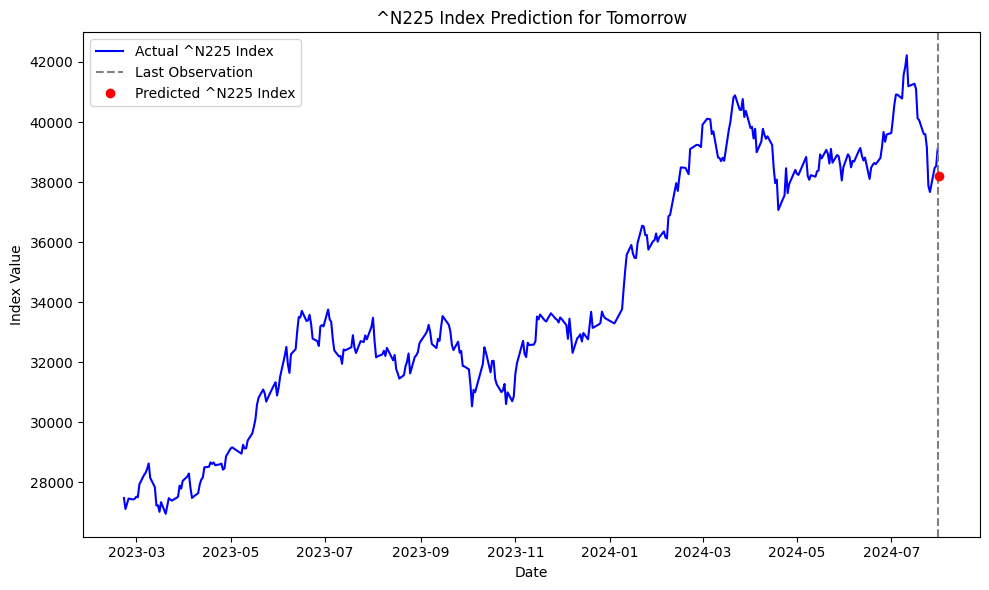

[*********************100%%**********************]  1 of 1 completed


Round 1, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 79.93677), ('loss', 0.24125762), ('num_examples', 303), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
Round 2, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 55.382652), ('loss', 0.05718736), ('num_examples', 303), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
Round 3, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 44.609226), ('loss', 0.031051664), ('num_examples', 303), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), (

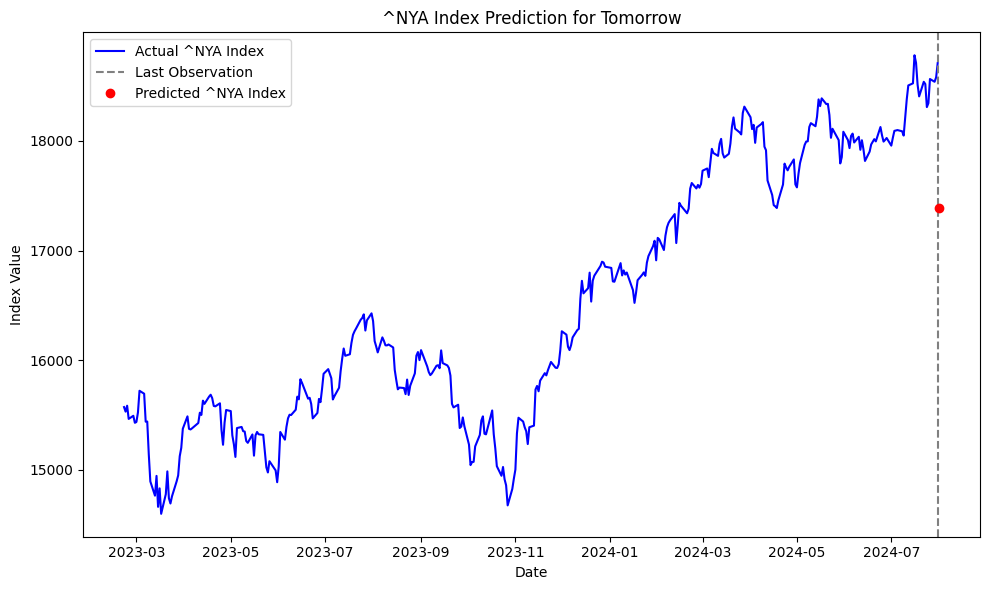

[*********************100%%**********************]  1 of 1 completed


Round 1, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 16735.32), ('loss', 0.24697313), ('num_examples', 306), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
Round 2, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 703878.56), ('loss', 0.093598574), ('num_examples', 306), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
Round 3, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 471208.6), ('loss', 0.040494807), ('num_examples', 306), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), (

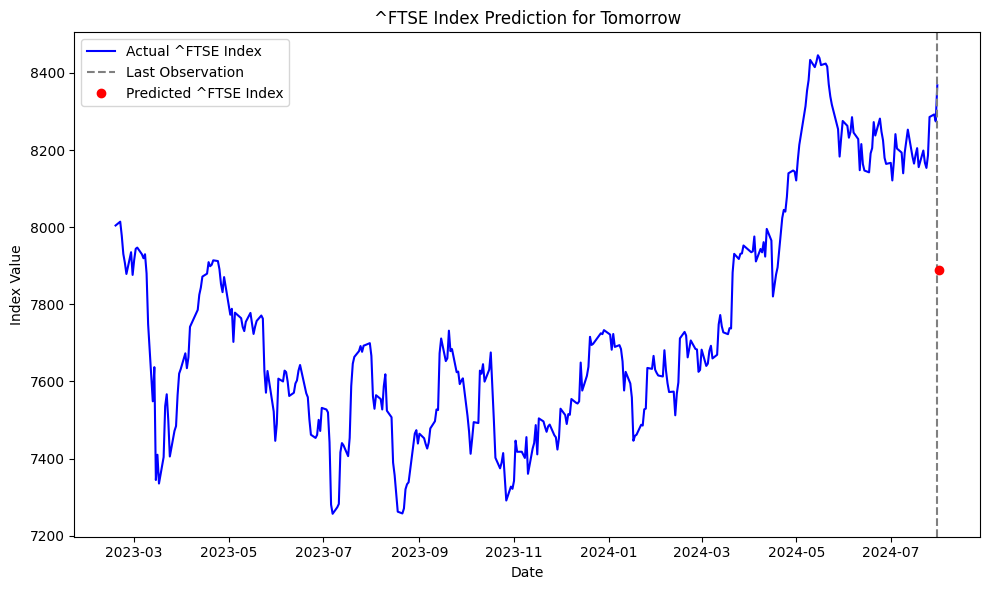

[*********************100%%**********************]  1 of 1 completed


Round 1, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 67.86231), ('loss', 0.14751512), ('num_examples', 293), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
Round 2, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 26.0675), ('loss', 0.02221228), ('num_examples', 293), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('finalizer', OrderedDict([('update_non_finite', 0)]))])
Round 3, Metrics: OrderedDict([('distributor', ()), ('client_work', OrderedDict([('train', OrderedDict([('mean_absolute_percentage_error', 24.10017), ('loss', 0.019110976), ('num_examples', 293), ('num_batches', 10)]))])), ('aggregator', OrderedDict([('mean_value', ()), ('mean_weight', ())])), ('fi

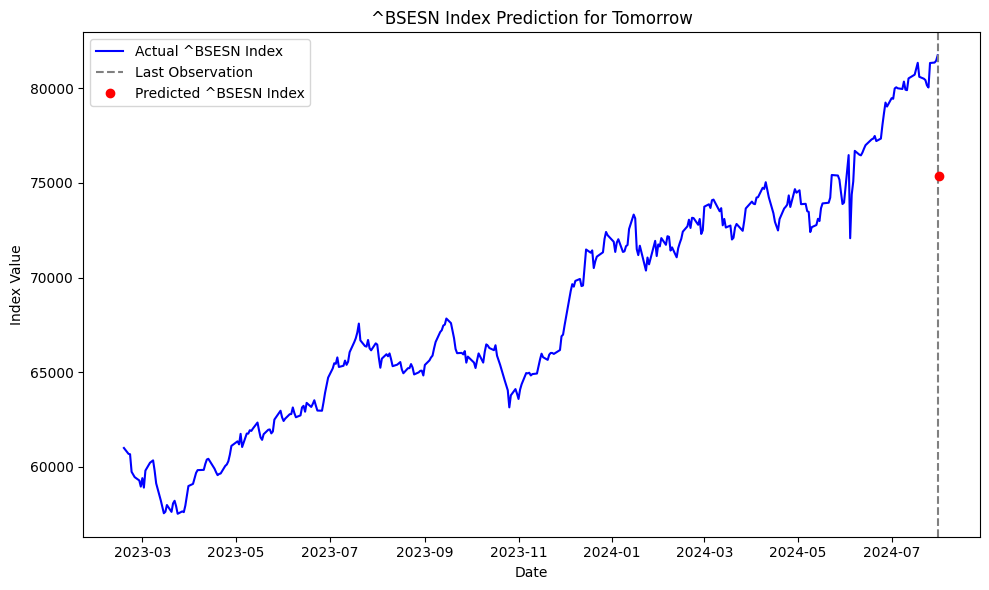

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
import ta
import tensorflow_federated as tff
import tensorflow as tf
from sklearn.metrics import mean_absolute_percentage_error

def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def add_technical_indicators(data):
    data['SMA'] = ta.trend.sma_indicator(data['Close'], window=14)
    data['EMA'] = ta.trend.ema_indicator(data['Close'], window=14)
    data['RSI'] = ta.momentum.rsi(data['Close'], window=14)
    macd = ta.trend.MACD(data['Close'])
    data['MACD'] = macd.macd()
    data['MACD_Signal'] = macd.macd_signal()
    data['MACD_Diff'] = macd.macd_diff()
    data = data.dropna()
    return data

def preprocess_data(data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)
    return scaled_data, scaler

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

def split_data(X, y, train_ratio):
    train_size = int(len(X) * train_ratio)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    return X_train, X_test, y_train, y_test

def build_federated_model(seq_length, feature_count):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, feature_count)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    return model

def split_data_among_clients(X, y, num_clients):
    client_data = []
    data_size_per_client = len(X) // num_clients
    for i in range(num_clients):
        start_idx = i * data_size_per_client
        end_idx = (i + 1) * data_size_per_client if i != num_clients - 1 else len(X)
        client_data.append((X[start_idx:end_idx], y[start_idx:end_idx]))
    return client_data

def create_federated_data(client_data):
    federated_data = []
    for X, y in client_data:
        dataset = tf.data.Dataset.from_tensor_slices((X, y)).batch(32)
        federated_data.append(dataset)
    return federated_data

def federated_learning_process(seq_length, feature_count, federated_data):
    def model_fn():
        model = build_federated_model(seq_length, feature_count)
        return tff.learning.models.from_keras_model(
            model,
            input_spec=federated_data[0].element_spec,
            loss=tf.keras.losses.MeanSquaredError(),
            metrics=[tf.keras.metrics.MeanAbsolutePercentageError()]
        )

    iterative_process = tff.learning.algorithms.build_weighted_fed_avg(
        model_fn,
        client_optimizer_fn=lambda: tf.keras.optimizers.Adam(),
        server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0)
    )

    state = iterative_process.initialize()

    for round_num in range(1, 11):
        state, metrics = iterative_process.next(state, federated_data)
        print(f'Round {round_num}, Metrics: {metrics}')

    return state

def get_global_weights(state):
    return state.global_model_weights.trainable

def main():
    tickers = ['^N225', '^NYA', '^FTSE', '^BSESN']
    start_date = '2023-01-01'
    end_date = '2024-08-01'
    seq_length = 60
    num_clients = 5

    predictions = {}
    actuals={}

    for ticker in tickers:
        data = fetch_stock_data(ticker, start_date, end_date)
        data = add_technical_indicators(data)
        feature_columns = ['Close', 'SMA', 'EMA', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Diff', 'Volume', 'Open', 'High', 'Low']
        data_features = data[feature_columns]
        scaled_data, scaler = preprocess_data(data_features)
        X, y = create_sequences(scaled_data, seq_length)

        client_data = split_data_among_clients(X, y, num_clients)
        federated_data = create_federated_data(client_data)

        state = federated_learning_process(seq_length, X.shape[2], federated_data)

        global_model = build_federated_model(seq_length, X.shape[2])
        global_weights = get_global_weights(state)
        global_model.set_weights(global_weights)

        last_sequence = scaled_data[-seq_length:].reshape(1, seq_length, X.shape[2])
        prediction = global_model.predict(last_sequence)
        prediction = scaler.inverse_transform(
            np.hstack((prediction, np.zeros((prediction.shape[0], scaled_data.shape[1] - 1))))
        )[:, 0][0]

        predictions[ticker] = prediction
        actuals[ticker] = data['Close'].iloc[-1]

        mape = mean_absolute_percentage_error([actuals[ticker]], [prediction])
        print(f"MAPE for {ticker}: {100 - mape:.2f}%")


        print(f"Predicted {ticker} Index for next day: {prediction}")
        last_row = data.iloc[-1]
        print(f"Previous Close: {last_row['Close']}")
        print(f"SMA: {last_row['SMA']}")
        print(f"EMA: {last_row['EMA']}")
        print(f"RSI: {last_row['RSI']}")
        print(f"MACD: {last_row['MACD']}")
        print(f"Volume: {last_row['Volume']}")
        print(f"Open: {last_row['Open']}")
        print(f"High: {last_row['High']}")
        print(f"Low: {last_row['Low']}")

        plt.figure(figsize=(10, 6))
        plt.plot(data.index, data['Close'], label=f'Actual {ticker} Index', color='blue')
        plt.axvline(x=data.index[-1], linestyle='--', color='gray', label='Last Observation')
        plt.plot(data.index[-1] + pd.Timedelta(days=1), prediction, 'ro', label=f'Predicted {ticker} Index')
        plt.title(f'{ticker} Index Prediction for Tomorrow')
        plt.xlabel('Date')
        plt.ylabel('Index Value')
        plt.legend()
        plt.tight_layout()
        plt.show()

main()